In [245]:
#### Implementation of ANN with SGD and Backprop
#### original OOP implementation can be found at: https://medium.com/binaryandmore/beginners-guide-to-deriving-and-implementing-backpropagation-e3c1a5a1e536
import numpy as np
import matplotlib.pyplot as plt

In [246]:
## layer:
## take input X: (Nx1)
## multiply by weights W: (h1xN)
## add bias b: (h1x1)
def layer(X, W, b): return np.dot(W, X) + b

In [247]:
## lets take the activation as sigmoid (element-wise)
def sigmoid(x): return 1 / (1 + np.exp(-x))

In [248]:
## lets define the derivative of the sigmoid
def sigmoid_prime(x): return sigmoid(x)*(1.0 - sigmoid(x))

In [249]:
## define the mse cost per sample
def mse(y_pred, y_true): return (1 / 2) * np.square(y_pred - y_true)

In [250]:
## derivative of mse
def mse_prime(y_pred, y_true): return (y_pred - y_true)

In [251]:
## NN parameters
N = 50
num_nes = [N, 40, 30, 10]
num_layers = len(num_nes) - 1
learning_rate = 0.01
num_epochs = 1000
num_data_samples = 100

## dict to hold neuron input-output pairs
layer_in_out_dict = dict()
## dict to hold the cost derivatives w.r.t to the params
layer_derivative_dict = dict()

In [252]:
## the dict to hold the layer weights and biases
weight_dict = {'w'+str(i): np.random.normal(size=(num_nes[i+1], num_nes[i])) for i in range(num_layers)}
bias_dict = {'b'+str(i): np.random.normal(size=(num_nes[i+1], 1)) for i in range(num_layers)}

In [253]:
def NN(inputs):
    a = inputs
    layer_in_out_dict['a0'] = a
    ## forward pass
    for i in range(num_layers):
        #print(i)
        z = layer(a, weight_dict['w'+str(i)], bias_dict['b'+str(i)])
        a = sigmoid(z)
        layer_in_out_dict['z'+str(i)] = z
        layer_in_out_dict['a'+str(i+1)] = a
    out = a
    return out

In [254]:
## Test the NN with a dummy forward pass
inp = np.random.uniform(0, 1, size=(N,1))
out_true = np.random.uniform(0, 1, size=(num_nes[-1], 1))
out = NN(inp)
error = mse(out, out_true)
print(np.mean(error))

0.06376861916564229


In [255]:
## Function to perform model prediction
def predict(inputs): return NN(inputs)

In [256]:
def compute_grads(inputs, targets):
    ## perform a forward pass (prediction)
    out = predict(inputs)
    ## Compute dC/dzL, dC/dwL and dC/dbL
    ## first dC/dzL = (a - y) * a * (1 - a)
    layer_derivative_dict['dz'+str(num_layers-1)] = mse_prime(out, targets) * out * (1 - out)
    ## second compute the dC/dwL = dC/dzL * dzL/dwL
    #print(layer_derivative_dict['dz'+str(num_layers-1)].shape)
    #print(layer_in_out_dict['a'+str(num_layers-1)].shape)
    layer_derivative_dict['dw'+str(num_layers-1)] = np.dot(layer_derivative_dict['dz'+str(num_layers-1)], \
                                                    np.transpose(layer_in_out_dict['a'+str(num_layers-1)]))
    ## third calculate the dC/dbL = dC/dzL * dzL/dbL
    layer_derivative_dict['db'+str(num_layers-1)] = layer_derivative_dict['dz'+str(num_layers-1)] * 1
    
    ## Now since we have the derivatives at the output layer, we can calculate the derivatives for the rest of the 
    ## layers
    for i in reversed(range(num_layers-1)):
        #print(i)
        ## first compute dC/dzl = [w(l+1)*dC/dz(l+1)]*sigmoid_prime(zl)
        layer_derivative_dict['dz'+str(i)] = np.dot(
                                                np.transpose(weight_dict['w'+str(i+1)]), layer_derivative_dict['dz'+str(i+1)]) \
                                                * sigmoid_prime(layer_in_out_dict['z'+str(i)])
        ## second compute dC/dwl = dC/dzl * dzl/dwl
        layer_derivative_dict['dw'+str(i)] = layer_derivative_dict['dz'+str(i)] * \
                                                    np.transpose(layer_in_out_dict['a'+str(i)])
        
        ## third compute dC/dbl = dC/dzl * dzl/dbl
        layer_derivative_dict['db'+str(i)] = layer_derivative_dict['dz'+str(i)] * 1

In [257]:
## test the gradient computation 
compute_grads(inp, out_true)
#print(layer_derivative_dict)

In [258]:
def update_param():
    for i in range(num_layers):
        weight_dict['w'+str(i)] = weight_dict['w'+str(i)] - learning_rate * layer_derivative_dict['dw'+str(i)]
        bias_dict['b'+str(i)] = bias_dict['b'+str(i)] - learning_rate * layer_derivative_dict['db'+str(i)]

In [259]:
## test param update function
update_param()

In [260]:
## make a dummy training dataset
inp_data = np.random.normal(size=(num_data_samples, num_nes[0]))
out_true_data = np.random.normal(size=(num_data_samples, num_nes[-1]))
#print(training_data)

In [261]:
mean_epoch_error_list = list()
for e in range(num_epochs):
    epoch_loss_list = list()
    for i in range(num_data_samples):
        inp = np.expand_dims(inp_data[i], 1)
        out_true = np.expand_dims(out_true_data[i], 1)
        #print(inp.shape)
        compute_grads(inp, out_true)
        update_param()
        out = predict(inp)
        error = np.mean(mse(out, out_true))
        epoch_loss_list.append(error)
    mean_epoch_error = np.mean(np.array(epoch_loss_list))
    mean_epoch_error_list.append(mean_epoch_error)
    print("Epoch loss: {}".format(mean_epoch_error))

Epoch loss: 0.6946907046374103
Epoch loss: 0.6474046392149464
Epoch loss: 0.6070019739570935
Epoch loss: 0.5827087120460103
Epoch loss: 0.5733645461417436
Epoch loss: 0.5694110188111604
Epoch loss: 0.5673042207665575
Epoch loss: 0.5659314593261283
Epoch loss: 0.5648826001814016
Epoch loss: 0.5639751725855714
Epoch loss: 0.5631060001100693
Epoch loss: 0.562191039146036
Epoch loss: 0.5611220869160909
Epoch loss: 0.5596971726919867
Epoch loss: 0.5574435748934096
Epoch loss: 0.5531940265077406
Epoch loss: 0.5450850792234307
Epoch loss: 0.5335788523179057
Epoch loss: 0.5246747183523128
Epoch loss: 0.520308252969101
Epoch loss: 0.5178411809254078
Epoch loss: 0.516105585125738
Epoch loss: 0.5147505578512278
Epoch loss: 0.5136348328555367
Epoch loss: 0.5126840721357905
Epoch loss: 0.5118543491497008
Epoch loss: 0.5111165878664423
Epoch loss: 0.5104495771387366
Epoch loss: 0.50983722566416
Epoch loss: 0.5092671410451942
Epoch loss: 0.5087295978951041
Epoch loss: 0.5082167985337468
Epoch loss: 0

Epoch loss: 0.42002745704745637
Epoch loss: 0.4197709156630765
Epoch loss: 0.41951265607547555
Epoch loss: 0.41925272974741246
Epoch loss: 0.4189912102061589
Epoch loss: 0.4187281944242244
Epoch loss: 0.41846380364202196
Epoch loss: 0.41819818365854333
Epoch loss: 0.41793150473835183
Epoch loss: 0.4176639613652334
Epoch loss: 0.4173957720431472
Epoch loss: 0.4171271791478444
Epoch loss: 0.4168584484726975
Epoch loss: 0.41658986769252926
Epoch loss: 0.4163217426871977
Epoch loss: 0.4160543907500731
Epoch loss: 0.41578813029121536
Epoch loss: 0.41552326764988734
Epoch loss: 0.4152600827196724
Epoch loss: 0.4149988157902441
Epoch loss: 0.4147396579630954
Epoch loss: 0.4144827466786748
Epoch loss: 0.4142281666358752
Epoch loss: 0.4139759551933752
Epoch loss: 0.41372611060882547
Epoch loss: 0.4134786013196569
Epoch loss: 0.41323337477681443
Epoch loss: 0.4129903648803544
Epoch loss: 0.41274949762683777
Epoch loss: 0.4125106950393382
Epoch loss: 0.4122738777669314
Epoch loss: 0.4120389669136

Epoch loss: 0.38336525953882594
Epoch loss: 0.3832851128489092
Epoch loss: 0.38320438764384224
Epoch loss: 0.38312308325065586
Epoch loss: 0.3830412170444762
Epoch loss: 0.3829588266876741
Epoch loss: 0.3828759715269351
Epoch loss: 0.38279273280002285
Epoch loss: 0.38270921237181993
Epoch loss: 0.38262552986431614
Epoch loss: 0.38254181825607547
Epoch loss: 0.3824582182669036
Epoch loss: 0.38237487205737297
Epoch loss: 0.38229191690210007
Epoch loss: 0.3822094795007467
Epoch loss: 0.38212767146797966
Epoch loss: 0.38204658632798105
Epoch loss: 0.38196629809023736
Epoch loss: 0.3818868612627055
Epoch loss: 0.3818083120084667
Epoch loss: 0.3817306700866235
Epoch loss: 0.381653941226377
Epoch loss: 0.38157811963986465
Epoch loss: 0.3815031904573514
Epoch loss: 0.38142913194654765
Epoch loss: 0.38135591744370023
Epoch loss: 0.3812835169729447
Epoch loss: 0.3812118985626909
Epoch loss: 0.3811410292865176
Epoch loss: 0.3810708760648927
Epoch loss: 0.38100140626632656
Epoch loss: 0.3809325881

Epoch loss: 0.3708633331397961
Epoch loss: 0.3708390393135753
Epoch loss: 0.37081485647779727
Epoch loss: 0.3707907825143114
Epoch loss: 0.37076681506683895
Epoch loss: 0.37074295155155307
Epoch loss: 0.3707191891686484
Epoch loss: 0.37069552491449137
Epoch loss: 0.37067195559397753
Epoch loss: 0.37064847783277544
Epoch loss: 0.37062508808919253
Epoch loss: 0.3706017826654589
Epoch loss: 0.37057855771828957
Epoch loss: 0.37055540926864544
Epoch loss: 0.37053233321067486
Epoch loss: 0.37050932531988096
Epoch loss: 0.3704863812606125
Epoch loss: 0.37046349659303707
Epoch loss: 0.37044066677980686
Epoch loss: 0.3704178871926874
Epoch loss: 0.37039515311947047
Epoch loss: 0.3703724597715526
Epoch loss: 0.3703498022926193
Epoch loss: 0.3703271757689327
Epoch loss: 0.3703045752417854
Epoch loss: 0.37028199572274223
Epoch loss: 0.37025943221234925
Epoch loss: 0.37023687972304375
Epoch loss: 0.370214333307033
Epoch loss: 0.37019178808993514
Epoch loss: 0.37016923931095425
Epoch loss: 0.3701466

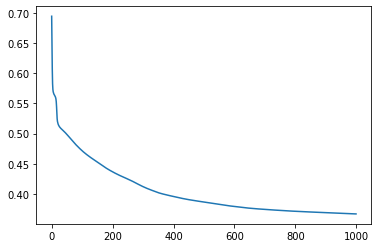

In [262]:
## Plot the model performance
plt.plot(np.arange(0, num_epochs, 1), mean_epoch_error_list)